
# Bonus Visualizations: Understanding Failure Modes in Long-Horizon Manipulation

This notebook provides simple illustrative visualizations that highlight two key challenges in robotic manipulation:
1. Error accumulation over long task horizons.
2. The importance of object-centric representations for physically grounded interaction.

These visualizations are not meant to reproduce full pipelines, but to support the conceptual analysis presented in the main repository.





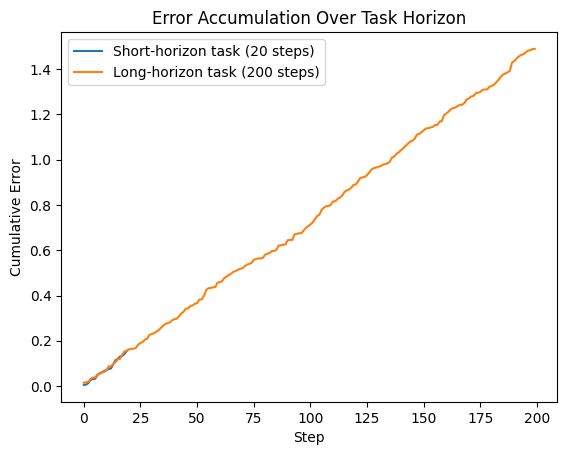

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

def simulate_error(num_steps, noise_scale=0.01):
    cumulative_error = 0.0
    errors = []
    for _ in range(num_steps):
        step_error = np.random.normal(0, noise_scale)
        cumulative_error += abs(step_error)
        errors.append(cumulative_error)
    return np.array(errors)

short_task = simulate_error(20)
long_task = simulate_error(200)

plt.figure()
plt.plot(short_task, label="Short-horizon task (20 steps)")
plt.plot(long_task, label="Long-horizon task (200 steps)")
plt.xlabel("Step")
plt.ylabel("Cumulative Error")
plt.title("Error Accumulation Over Task Horizon")
plt.legend()
plt.show()


## Error Accumulation in Long-Horizon Tasks

Even when per-step execution noise is small, cumulative error grows significantly as the task horizon increases. This illustrates why policies that perform well on short manipulation tasks often fail when extended to longer sequences without hierarchical correction or stable control mechanisms.


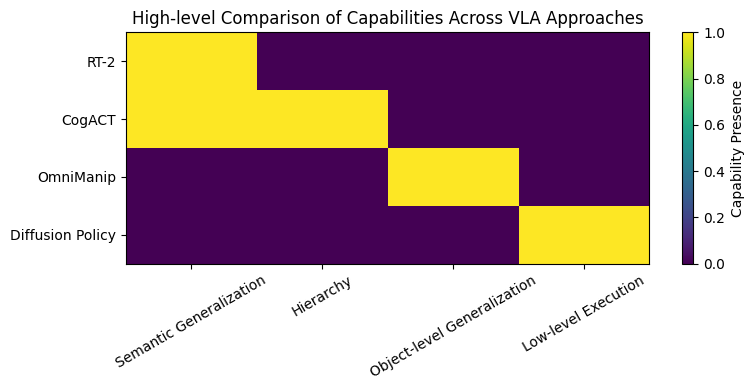

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Conceptual comparison data
data = {
    "Paper": ["RT-2", "CogACT", "OmniManip", "Diffusion Policy"],
    "Semantic Generalization": [1, 1, 0, 0],
    "Hierarchy": [0, 1, 0, 0],
    "Object-level Generalization": [0, 0, 1, 0],
    "Low-level Execution": [0, 0, 0, 1]
}

df = pd.DataFrame(data)

plt.figure(figsize=(8, 4))
plt.imshow(df.iloc[:, 1:].values, aspect="auto")
plt.xticks(range(len(df.columns[1:])), df.columns[1:], rotation=30)
plt.yticks(range(len(df["Paper"])), df["Paper"])
plt.colorbar(label="Capability Presence")
plt.title("High-level Comparison of Capabilities Across VLA Approaches")
plt.tight_layout()
plt.show()


## High-level Capability Comparison

This figure provides a conceptual comparison of the reviewed approaches across key dimensions relevant to generalization and long-horizon manipulation. Each method focuses on a distinct capability, highlighting the lack of a unified framework that jointly addresses semantic reasoning, hierarchy, object-level grounding, and stable low-level execution.


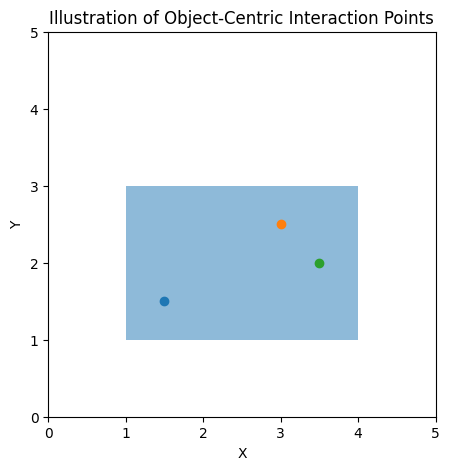

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))

# Object represented as a simple geometric proxy
rect = plt.Rectangle((1, 1), 3, 2, alpha=0.5)
plt.gca().add_patch(rect)

# Interaction points (contacts / affordances)
interaction_points = [(1.5, 1.5), (3.0, 2.5), (3.5, 2.0)]
for x, y in interaction_points:
    plt.scatter(x, y)

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Illustration of Object-Centric Interaction Points")
plt.show()



##Object-Centric Grounding
This visualization highlights the concept of object-centric representations, where manipulation decisions are conditioned on object geometry and interaction points rather than raw visual input. Such grounding can improve generalization across object instances and support more physically consistent contact-rich manipulation